# Getting started

## Reading a RAMSES output

Navigate to the directory containing the data of your simulation and launch an `ipython` console or a Jupyter notebook.

Import the `osyris` module and load the output of your choice (this will be output number `71` in this example).

**IMPORTANT:** The data loader searches for a `hydro_file_descriptor.txt` inside the output directory to get the variable names, so make sure your version of RAMSES supports this. If it doesn’t, you can edit the `var_names` list in the `config.py` configuration file, under `default_values` to match your data structure. By default it will try to guess by itself which are the variables to read, but this will *almost certainly* fail without editing it!

Note: you can download the sample data used in this tutorial [here](http://www.nbi.dk/~nvaytet/osyris/ramses_sample_data.tar.gz).

In [1]:
import osyris
mydata = osyris.RamsesData(71,scale="au")
mydata

Processing 60 files in output_00071
 10% : read     369140 cells
 20% : read     577355 cells
 30% : read     652555 cells
 40% : read    1057064 cells
 50% : read    1229148 cells
 60% : read    1598288 cells
 70% : read    1806511 cells
 80% : read    1881703 cells
 90% : read    2273577 cells
Total number of cells loaded: 2458296
Generating data structure... please wait
Memory used: 727.66 MB
output_00071 successfully loaded


The variables are:
Name               Type   Group Unit      Min        Max 
B                  vector hydro [G      ] 7.056e-06  18.122   
B_left             vector hydro [G      ] 7.050e-06  18.197   
B_right            vector hydro [G      ] 7.050e-06  18.197   
cpu                scalar amr   [       ] 1.0        60.0     
density            scalar hydro [g/cm3  ] 1.538e-20  2.629e-09
dx                 scalar amr   [au     ] 0.084      172.408  
grav_acceleration  vector grav  [cm/s2  ] 2.803e-10  0.005    
grav_potential     scalar grav  [       ] -1.523e+06 4188.759 
level              scalar amr   [       ] 6.0        17.0     
log_B              scalar hydro [G      ] -5.151     1.258    
log_T              scalar hydro [K      ] 0.978      2.848    
log_m              scalar hydro [Msun   ] -9.510     -4.548   
log_r              scalar amr   [au     ] -1.137     3.973    
log_rho            scalar hydro [g/cm3  ] -19.813    -8.580   
mass               scalar hydro [Msun   ]

In the call to `RamsesData`, the first argument is the output number. 
**Note** that you can use `-1` to select the last output in the directory. 

The second argument is the spatial scale you want to convert distances to. Possible choices are `"cm"`, `"au"` or `"pc"`.

The text `__repr__` of the returned object lists all the variables contained in the loaded file, along with their minimum and maximu values.

`osyris` tries to guess the units of each variable field according to its name. This is done by the `get_units()` function and can easily be modified if you have non-standard variables.

## Creating a 2D histogram

We now wish to plot a 2d histogram of the logarithm of density `log_rho` versus logarithm of gas temperature `log_T` for all the cells inside the computational domain. We also use a logarithmic colormap which represents the cell density in the $(\rho,T)$ plane

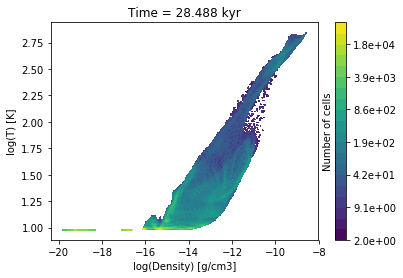

In [3]:
osyris.plot_histogram(mydata.log_rho, mydata.log_T,
                      scalar_args={"cmap": "log"})

You can also save the figure to file directly by specifying the argument `fname="rhoT_histogram.pdf"` in the call.

## Plotting a 2D slice

To take a slice through the data, simply use

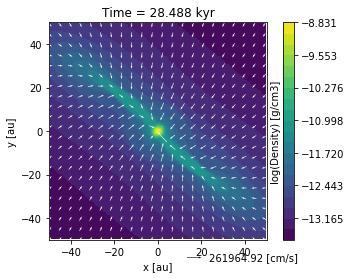

In [4]:
osyris.plot_slice(mydata.log_rho, direction="z",
                  vec=mydata.velocity, dx=100)

where the first argument is the variable to display, `direction` is the normal to the slice plane, `vec` is the (optional) variable to be used to plot vectors, and `dx` is the extent of the slice.

**Note:** the units of `dx` are consistent with the scale specified when reading in the snapshot using `RamsesOutput` (`au` in this case).

## Further examples

For more examples of how you can use `osyris`, go to the [demos](demos.ipynb) page.